## Contents
* K-Means Clustering
* Agglomerate Clustering (Hierachical Clustering)
* DBSCAN (Density-Based spatial Clustering of Applciation with Noise)
* Gaussian Mixture model

## Referneces
* scikit-learn datasets: https://scikit-learn.org/stable/datasets/index.html#datasets
* scikit-learn K-means clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
* scikit-learn Agglomerative clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* linkage:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
* DBSCAN: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html?highlight=dbscan#sklearn.cluster.dbscan
* DBSCAN (wiki) : https://en.wikipedia.org/wiki/DBSCAN
* (wiki) elbow method: https://en.wikipedia.org/wiki/Elbow_method_(clustering)https://en.wikipedia.org/wiki/Elbow_method_(clustering)  
* Gaussian Mixture Model : https://scikit-learn.org/stable/modules/mixture.html


## Instatallation
* numpy
* matplotlib
* scikit-learn
* scipy





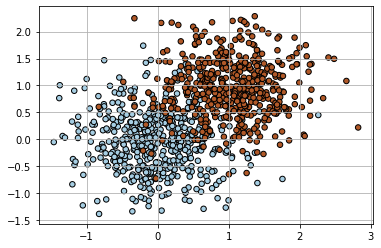

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time

# make blobs data
X0, y0 = make_blobs(n_samples=[500,500],
                 centers=[[0.0, 0.0], [1.0, 1.0]],
                 cluster_std=[0.55, 0.55],
                 random_state=2,
                 shuffle=False)

plt.scatter(X0[:,0], X0[:, 1], c=y0, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

label:  [0 1]
center:
 [[ 1.07158497  1.00254579]
 [-0.0357928  -0.07651108]]


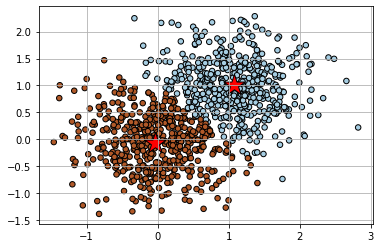

In [82]:
# K-means model
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100).fit(X0)

# clustering
cl0_pred = kmeans.predict(X0)

# labels & centers
print("label: ", np.unique(kmeans.labels_))
print("center:\n", kmeans.cluster_centers_)

# visualization
plt.scatter(X0[:,0], X0[:, 1], c=cl0_pred, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           s = 500, marker='*', edgecolor='black')
plt.grid()

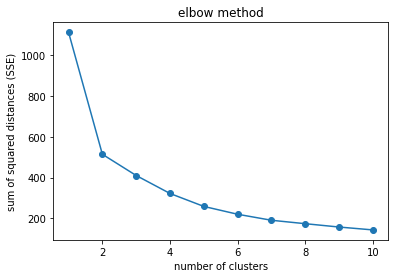

In [83]:
# find the proper number of clusters
num_of_clusters = 10
distortions = []
for i in range(1, num_of_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=1, max_iter=100).fit(X0)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, num_of_clusters+1), distortions, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distances (SSE)')
plt.title('elbow method')
plt.show()    

* ###  K-means Clustering (circle data,  imbalanced, blob/line, moon data)

label:  [0 1]
center:
 [[ 0.36274995 -0.01537801]
 [-0.35766078  0.01550935]]


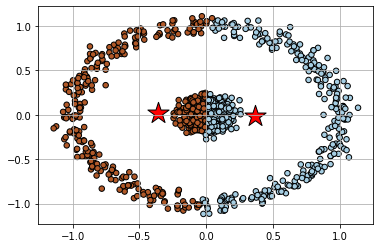

In [84]:
# 1. circle data

from sklearn.datasets import make_circles

X1, y1 = make_circles(n_samples=1000, noise=0.06, factor=0.12) # factor : Scale factor between inner & outer circle

# plt.scatter(X1[:,0], X1[:, 1], c=y1, s=30, cmap=plt.cm.Paired, edgecolors='k')
# plt.grid()

# K-means model & clustering
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100).fit(X1)

cl1_pred = kmeans.predict(X1)

print("label: ", np.unique(kmeans.labels_))
print("center:\n", kmeans.cluster_centers_)

# visualization
plt.scatter(X1[:,0], X1[:, 1], c=cl1_pred, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           s = 500, marker='*', edgecolor='black')
plt.grid()

label:  [0 1]
center:
 [[-7.17225152e+01  9.51820380e-03]
 [ 7.03503472e+01  6.83075860e-03]]


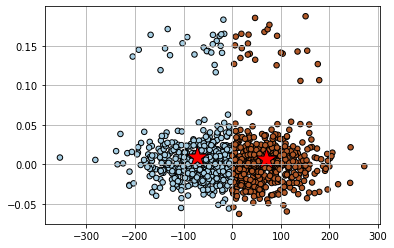

In [85]:
# 2. imbalanced data


from sklearn.datasets import make_blobs

n_samples_1 = 950
n_samples_2 = 50
centers = [[0.0, 0.0], [0.0, 0.15]]
clusters_std = [[90.0, 0.02], [100.0, 0.02]]

# Generate isotropic gaussian blobs
X2, y2 = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers=centers,
                 cluster_std=clusters_std,
                 random_state=500,
                 shuffle=False)

# k-means model & clustering
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100).fit(X2)

cl2_pred = kmeans.predict(X2)

print("label: ", np.unique(kmeans.labels_))
print("center:\n", kmeans.cluster_centers_)

# visualization
plt.scatter(X2[:,0], X2[:, 1], c=cl2_pred, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           s = 500, marker='*', edgecolor='black')
plt.grid()

`make_classification`함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.

* 인수:	
 * `n_samples` : 표본 데이터의 수, 디폴트 100
 * `n_features` : 독립 변수의 수, 디폴트 20
 * `n_informative` : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
 * `n_redundant` : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
 * `n_repeated` : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
 * `n_classes` : 종속 변수의 클래스 수, 디폴트 2
 * `n_clusters_per_class` : 클래스 당 클러스터의 수, 디폴트 2
 * `weights` : 각 클래스에 할당된 표본 수
 * `random_state` : 난수 발생 시드    
  
* 반환값:	
 * `X` : [n_samples, n_features] 크기의 배열 
    * 독립 변수
 * `y` : [n_samples] 크기의 배열 
    * 종속 변수

label:  [0 1]
center:
 [[-0.8978843   0.79323306]
 [ 1.28359454  1.26323503]]


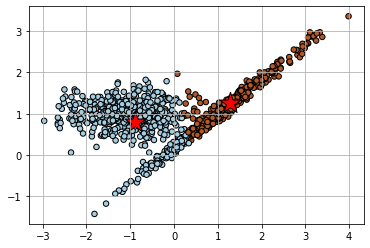

In [86]:
# 3. blob/line data


from sklearn.datasets import make_classification

# generate data
X3, y3 = make_classification(n_samples=1000, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_clusters_per_class=1,                          
                          random_state=11)

# clustering
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100).fit(X3)

cl3_pred = kmeans.predict(X3)

print("label: ", np.unique(kmeans.labels_))
print("center:\n", kmeans.cluster_centers_)


# visualization
plt.scatter(X3[:,0], X3[:, 1], c=cl3_pred, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           s = 500, marker='*', edgecolor='black')
plt.grid()


label:  [0 1]
center:
 [[ 1.21499769 -0.08244338]
 [-0.18851291  0.5694509 ]]


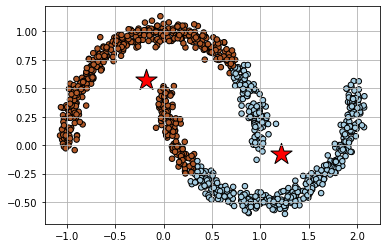

In [87]:
# 4. moon data

from sklearn.datasets import make_moons

X4, y4 = make_moons(n_samples=1000, noise=0.05, random_state=0)


# clustering
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=100).fit(X4)

cl4_pred = kmeans.predict(X4)

print("label: ", np.unique(kmeans.labels_))
print("center:\n", kmeans.cluster_centers_)


# visualization
plt.scatter(X4[:,0], X4[:, 1], c=cl4_pred, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',
           s = 500, marker='*', edgecolor='black')
plt.grid()

* ### Agglomerative Clustering

single : 클러스터 포인트 사이의 최소거리가 가장 짧은 두 클러스터를 합침



average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.

complete : complete연결(최대 연결)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침



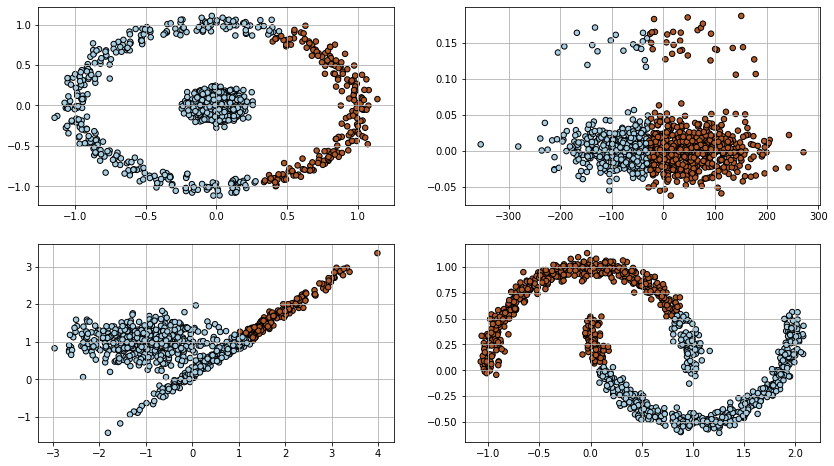

In [88]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

# clustering
cl1_pred_agg = agg.fit_predict(X1)
cl2_pred_agg = agg.fit_predict(X2)
cl3_pred_agg = agg.fit_predict(X3)
cl4_pred_agg = agg.fit_predict(X4)


# visualization
plt.figure(figsize=(14, 8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:, 1], c=cl1_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(222)
plt.scatter(X2[:,0], X2[:, 1], c=cl2_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()


plt.subplot(223)
plt.scatter(X3[:,0], X3[:, 1], c=cl3_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(224)
plt.scatter(X4[:,0], X4[:, 1], c=cl4_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()



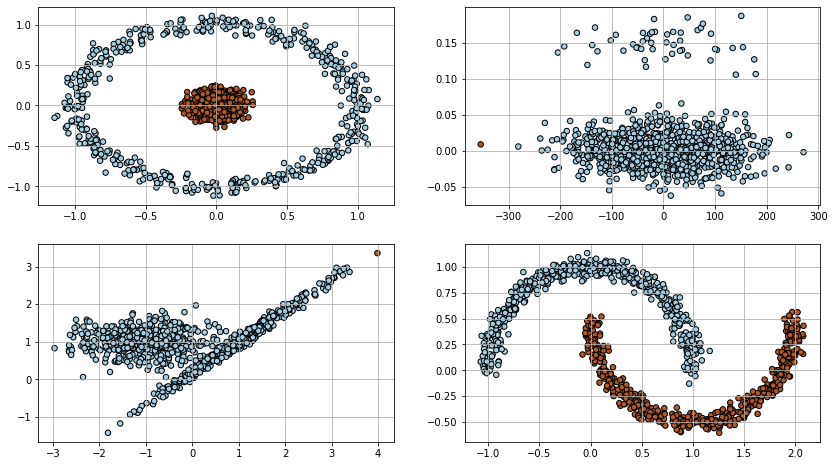

In [89]:
from sklearn.cluster import AgglomerativeClustering


# clustering
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')

t_start = time.time()
cl1_pred_agg = agg.fit_predict(X1)
cl2_pred_agg = agg.fit_predict(X2)
cl3_pred_agg = agg.fit_predict(X3)
cl4_pred_agg = agg.fit_predict(X4)
t_end = time.time()
t_agg = t_end - t_start


# visualization
plt.figure(figsize=(14, 8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:, 1], c=cl1_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(222)
plt.scatter(X2[:,0], X2[:, 1], c=cl2_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()


plt.subplot(223)
plt.scatter(X3[:,0], X3[:, 1], c=cl3_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(224)
plt.scatter(X4[:,0], X4[:, 1], c=cl4_pred_agg, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

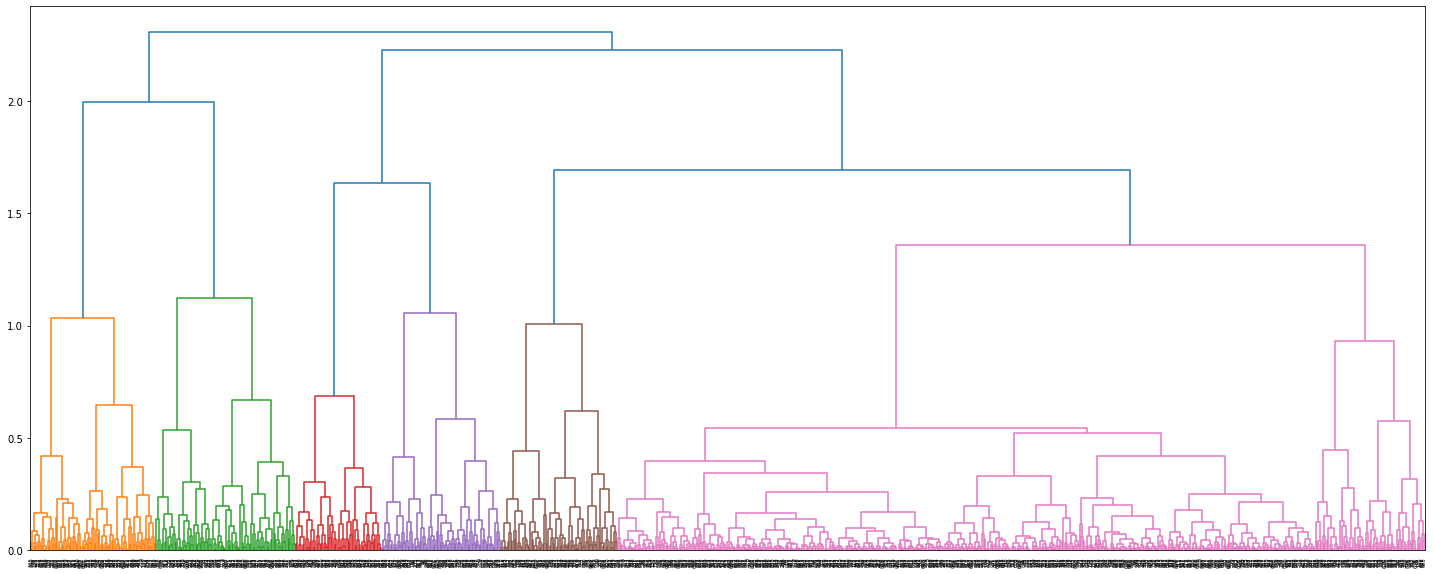

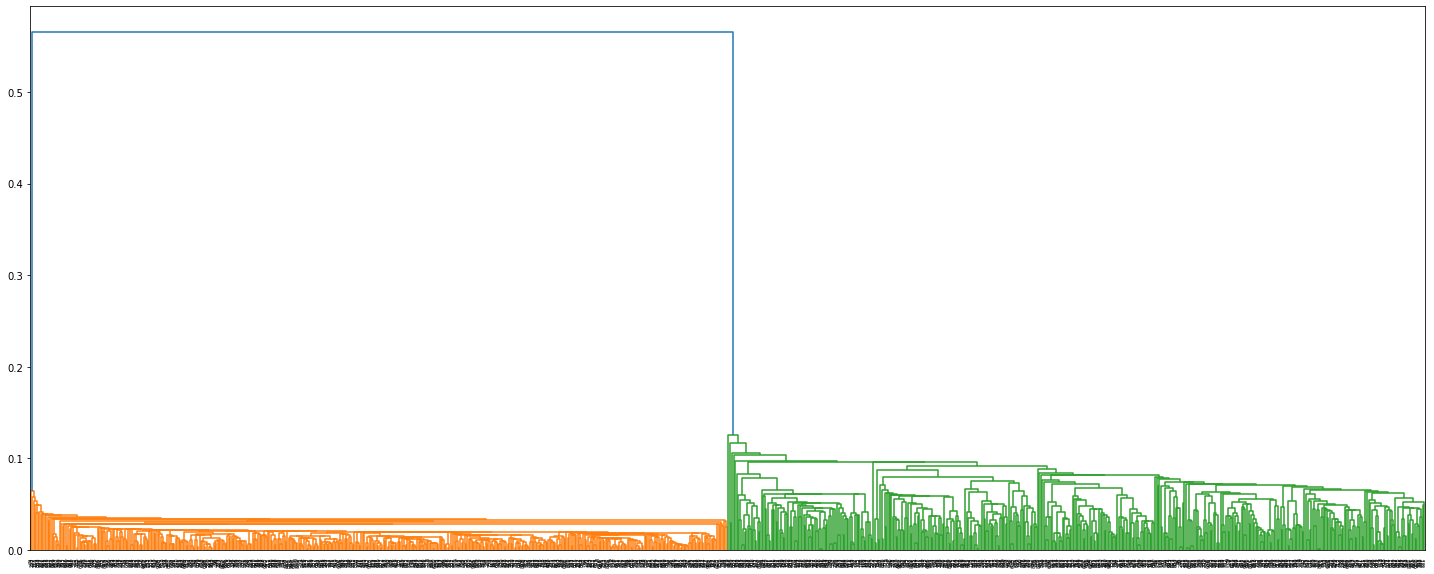

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z1)
plt.show()

Z1 = linkage(X1, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z1)


* ### DBSCAN

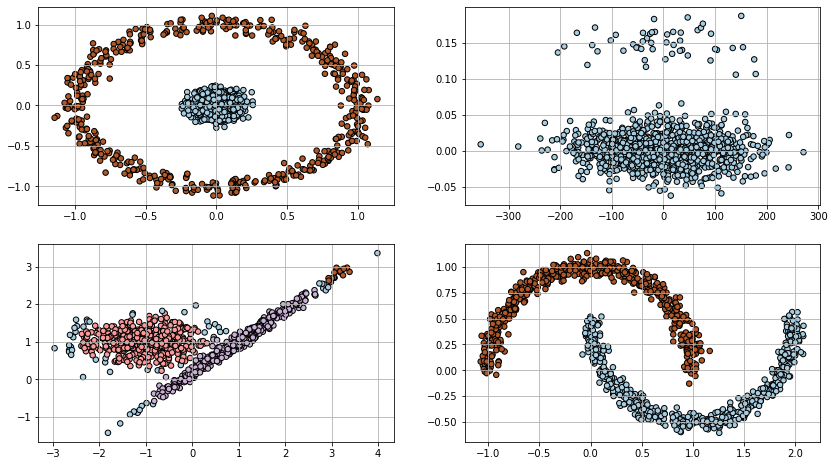

In [91]:
from sklearn.cluster import DBSCAN

# clustering
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean') # min_samples : 3, 10

t_start = time.time()
cl1_pred_db = db.fit_predict(X1)
cl2_pred_db = db.fit_predict(X2)
cl3_pred_db = db.fit_predict(X3)
cl4_pred_db = db.fit_predict(X4)
t_end = time.time()
t_db = t_end - t_start


# Standard Scaler (imbalanced data)
'''
from sklearn.preprocessing import StandardScaler
X2_std = StandardScaler().fit_transform(X2)

db = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
cl2_pred_db = db.fit_predict(X2_std)
'''


# visualization
plt.figure(figsize=(14, 8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:, 1], c=cl1_pred_db, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(222)
plt.scatter(X2[:,0], X2[:, 1], c=cl2_pred_db, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()


plt.subplot(223)
plt.scatter(X3[:,0], X3[:, 1], c=cl3_pred_db, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(224)
plt.scatter(X4[:,0], X4[:, 1], c=cl4_pred_db, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()



* ### GMM


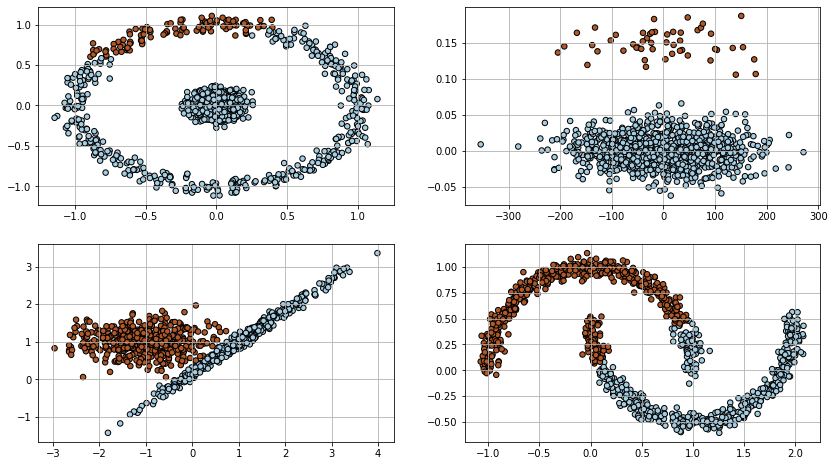

In [92]:

from sklearn.mixture import GaussianMixture

# clustering
gmm = GaussianMixture(n_components=2)

t_start = time.time()
cl1_pred_gmm = gmm.fit_predict(X1)
cl2_pred_gmm = gmm.fit_predict(X2)
cl3_pred_gmm = gmm.fit_predict(X3)
cl4_pred_gmm = gmm.fit_predict(X4)
t_end = time.time()
t_gmm = t_end - t_start


# visualization
plt.figure(figsize=(14, 8))

plt.subplot(221)
plt.scatter(X1[:,0], X1[:, 1], c=cl1_pred_gmm, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(222)
plt.scatter(X2[:,0], X2[:, 1], c=cl2_pred_gmm, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()


plt.subplot(223)
plt.scatter(X3[:,0], X3[:, 1], c=cl3_pred_gmm, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()

plt.subplot(224)
plt.scatter(X4[:,0], X4[:, 1], c=cl4_pred_gmm, s=30, cmap=plt.cm.Paired, edgecolors='k')
plt.grid()


* ### Clustering digits dataset

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


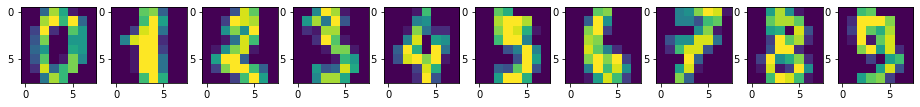

In [140]:
# digit dataset : MNIST > 8x8 image from scikit-learn

from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

print(X.shape)
print(np.unique(y))

# digit data
plt.figure(figsize=(16, 16))
for i in range(10):   
    plt.subplot(1, 10, i+1)
    plt.imshow(X[i].reshape(8, 8))


In [149]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

class kmean_clustering:
    
    def __init__(self, X, y):
        self.X = X 
        self.y = y
        
    def fit(self, n_clusters, init, n_init, max_iter, random_state):
        self.index = []
        self.model = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)
        
        cl_pred = self.model.fit_predict(self.X)
        centers = self.model.cluster_centers_.reshape(10, 8, 8)
        
        # display center of clusters
        plt.figure(figsize=(16, 16))
        
        for i, center in enumerate(centers):
            plt.subplot(1, 10, i+1)
            plt.imshow(center, cmap='gray')
        
        # zeros_like : an array of zeros with the same shape & type as given array
        y_pred = np.zeros_like(cl_pred) 

        for i in range(10):
            mask = (cl_pred==i)
            # mode : an array of the most common value in the passed array
            y_pred[mask] = mode(self.y[mask])[0] 
            
            self.index.append(y_pred[mask][0])
            print(mode(self.y[mask]))

        # accuracy & confusion matrix
        print("accuracy:\t",accuracy_score(self.y, y_pred))
        print("confusion_matrix:")
        print(confusion_matrix(self.y, y_pred))

            
    def predict(self, X_test):
        return self.index[int(self.model.predict(X_test.reshape(1, 64)))]

ModeResult(mode=array([2]), count=array([148]))
ModeResult(mode=array([0]), count=array([177]))
ModeResult(mode=array([1]), count=array([99]))
ModeResult(mode=array([9]), count=array([139]))
ModeResult(mode=array([4]), count=array([163]))
ModeResult(mode=array([5]), count=array([137]))
ModeResult(mode=array([6]), count=array([177]))
ModeResult(mode=array([1]), count=array([55]))
ModeResult(mode=array([7]), count=array([168]))
ModeResult(mode=array([3]), count=array([154]))
accuracy:	 0.7885364496382861
confusion_matrix:
[[177   0   0   0   1   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  11 148  13   0   0   0   2   0   2]
 [  0   7   0 154   0   2   0   7   0  13]
 [  0   9   0   0 163   0   0   9   0   0]
 [  0   0   0   1   1 137   1   0   0  42]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   6   0   0   0   5   0 168   0   0]
 [  0 105   3   2   0   7   2   3   0  52]
 [  0  20   0   6   0   7   0   8   0 139]]


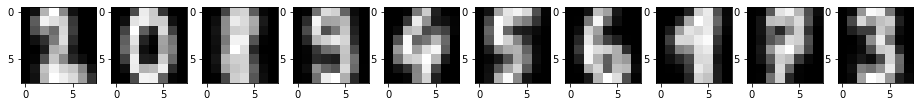

In [150]:
km = kmean_clustering(X, y)
km.fit(10, 'k-means++', 1, 300, 0)

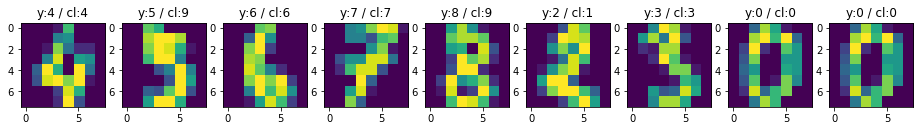

In [152]:
#test = [0, 1, 10, 8, 100, 200, 500, 270, 364, 1003]
test = [4, 5, 6,7, 8, 2, 3,0, 0]
plt.figure(figsize=(16, 16))
for i in range(len(test)):
    plt.subplot(1, len(test), i+1)
    plt.imshow(X[test[i]].reshape(8, 8))
    plt.title("y:{:d} / cl:{:d}".format(y[test[i]], km.predict(X[test[i]])))
    